<a href="https://colab.research.google.com/github/Brickhoff/kaggle_data/blob/master/homework3_dogs_and_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Xuezhang Wu
# UIN: 227000740

In [2]:
!git clone https://github.com/Brickhoff/kaggle_data.git

Cloning into 'kaggle_data'...
remote: Enumerating objects: 4011, done.
remote: Counting objects: 100% (4011/4011), done.
remote: Compressing objects: 100% (4011/4011), done.
remote: Total 4011 (delta 0), reused 4011 (delta 0), pack-reused 0
Receiving objects: 100% (4011/4011), 86.08 MiB | 28.22 MiB/s, done.


In [0]:
import os


# The directory where we will
# store our smaller dataset
base_dir = 'kaggle_data'


# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'validation')

test_dir = os.path.join(base_dir, 'test')


# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')


# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')


# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')


# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')


# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')



In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [5]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [6]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [7]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [8]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [9]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


In [10]:
# Instantiating a small convnet for cats vs. dogs classification

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
# Configuring our model for training

from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [13]:
# Using ImageDataGenerator to read images from directories

from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    train_dir,
    # All images will be resized to 150x150
    target_size=(150, 150),
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
# Displaying the shapes of a batch of data and labels

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [15]:
# Fitting our model using a batch generator

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 16s 156ms/step - loss: 0.6859 - acc: 0.5385 - val_loss: 0.6645 - val_acc: 0.6130
Epoch 2/30
100/100 [==============================] - 11s 107ms/step - loss: 0.6545 - acc: 0.6035 - val_loss: 0.6345 - val_acc: 0.6420
Epoch 3/30
100/100 [==============================] - 11s 107ms/step - loss: 0.6037 - acc: 0.6750 - val_loss: 0.6134 - val_acc: 0.6490
Epoch 4/30
100/100 [==============================] - 11s 107ms/step - loss: 0.5625 - acc: 0.7085 - val_loss: 0.6039 - val_acc: 0.6680
Epoch 5/30
100/100 [==============================] - 11s 107ms/step - loss: 0.5409 - acc: 0.7305 - val_loss: 0.5831 - val_acc: 0.6760
Epoch 6/30
100/100 [==============================] - 11s 106ms/step - loss: 0.5137 - acc: 0.7400 - val_loss: 0.5859 - val_acc: 0.6920
Epoch 7/30
100/100 [==============================] - 11s 107ms/step - loss: 0.4881 - acc: 0.7610 - val_loss: 0.5693 - val_acc: 0.6940
Epoch 8

In [0]:
# Saving our model

model.save('cats_and_dogs_small_1.h5')

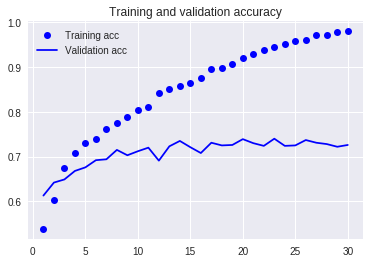

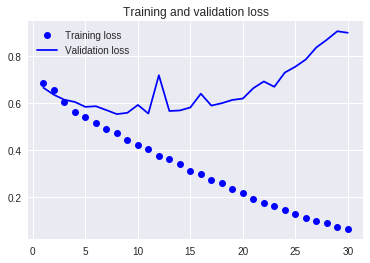

In [17]:
# Displaying curves of loss and accuracy during training

import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# Setting up a data augmentation configuration via ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

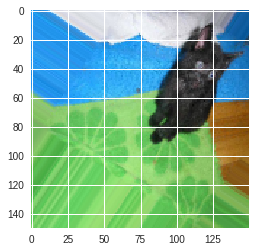

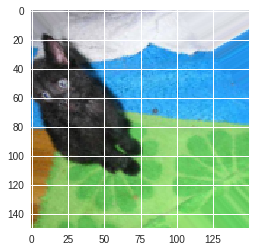

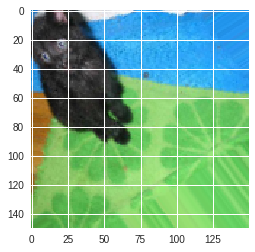

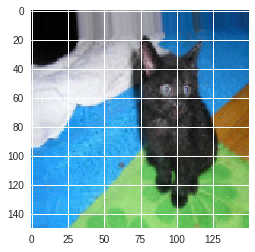

In [19]:
# Displaying some randomly augmented training images

# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [20]:
# Defining a new convnet that includes dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
# Training our convnet using data augmentation generators

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    train_dir,
    # All images will be resized to 150x150
    target_size=(150, 150),
    batch_size=32,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 34s 341ms/step - loss: 0.6955 - acc: 0.5034 - val_loss: 0.6840 - val_acc: 0.5089
Epoch 2/100
100/100 [==============================] - 31s 307ms/step - loss: 0.6794 - acc: 0.5600 - val_loss: 0.6585 - val_acc: 0.5915
Epoch 3/100
100/100 [==============================] - 32s 316ms/step - loss: 0.6701 - acc: 0.5919 - val_loss: 0.6463 - val_acc: 0.6148
Epoch 4/100
100/100 [==============================] - 31s 312ms/step - loss: 0.6527 - acc: 0.6162 - val_loss: 0.6600 - val_acc: 0.6024
Epoch 5/100
100/100 [==============================] - 31s 311ms/step - loss: 0.6384 - acc: 0.6275 - val_loss: 0.6067 - val_acc: 0.6707
Epoch 6/100
100/100 [==============================] - 31s 314ms/step - loss: 0.6135 - acc: 0.6581 - val_loss: 0.5801 - val_acc: 0.6952
Epoch 7/100
100/100 [==============================] - 31s 314ms/step - loss: 0.6056 - acc: 0.6684 -

In [0]:
# Saving our model

model.save('cats_and_dogs_small_2.h5')

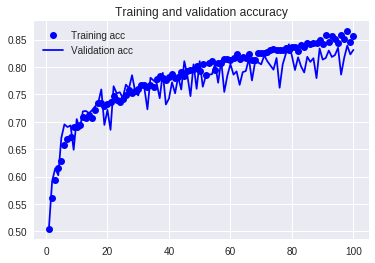

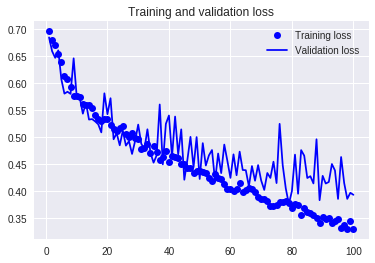

In [23]:
# Let’s plot our results again

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()